# GRADIENT DESCENT REGRESSOR FOR BOTH m AND b

In [3]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [4]:
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

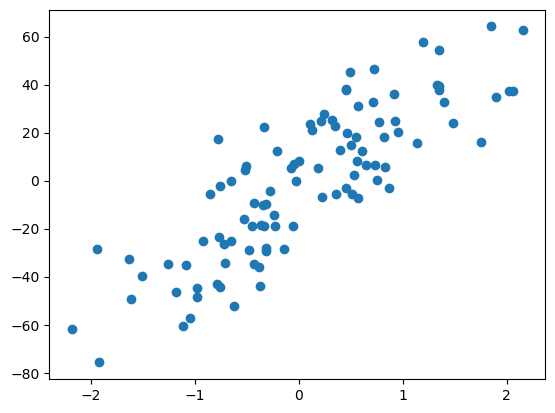

In [5]:
plt.scatter(x,y)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
Lr = LinearRegression()

In [10]:
Lr.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred = Lr.predict(x_test)

In [12]:
from sklearn.metrics import r2_score

In [13]:
r2_score(y_test,y_pred)

0.6345158782661012

In [14]:
print(Lr.coef_)
print(Lr.intercept_)

[28.12597332]
-2.2710144261783825


In [15]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,x,y):
        
        for i in range(self.epochs):
            # dL/db = -2 * submittion(yi - mxi - b)
            loss_slope_b = -2 * np.sum( y - self.m*x.ravel() -self.b)
            # dL/dm = -2 * submittion(yi - mxi - b)(xi)
            loss_slope_m = -2 * np.sum( (y - self.m*x.ravel() - self.b) * x.ravel())  
            
            # b = b - n*slope(b)
            self.b = self.b - (self.lr*loss_slope_b )
            # m = m * n*slope(m)
            self.m = self.m -  (self.lr*loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,x):
        return self.m * x + self.b
    

In [16]:
gd = GDRegressor(0.001,50)

In [17]:
gd.fit(x_train,y_train)

28.159367347119066 -2.3004574196824854


In [18]:
gd.predict(x_train)

array([[-35.68110113],
       [  8.88560702],
       [-11.23446644],
       [ 31.22904975],
       [ 18.92512693],
       [ 21.95071003],
       [-48.4562909 ],
       [-30.0138024 ],
       [-12.72269202],
       [ 50.99796601],
       [-56.48357018],
       [-14.61020252],
       [-47.78087586],
       [ 23.42990275],
       [  3.82284374],
       [ 35.72330515],
       [ -9.15237073],
       [ 11.52218283],
       [ 55.53024484],
       [ 54.44688608],
       [  3.55106062],
       [-24.11439386],
       [ 13.12857554],
       [ 11.81125176],
       [-11.16666165],
       [ 10.46928178],
       [ 46.95708473],
       [-11.83573323],
       [ -3.55363595],
       [ 35.71997964],
       [-14.40608727],
       [ 49.78346228],
       [  7.82374456],
       [ 10.81217647],
       [ -4.59971358],
       [ -2.36773087],
       [ 13.5998501 ],
       [ 23.67217027],
       [-33.85322203],
       [-22.60335208],
       [  6.63594379],
       [-57.08142825],
       [  7.52013867],
       [-11

In [19]:
y_pred = gd.predict(x_test)
r2_score(y_test,y_pred)

0.6343842836315579

In [45]:
# Animation to see how the gradient descent works
b = -129
m = 100
lr = 0.001
all_b = []
all_m = []
all_cost = []
epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(x.shape[0]):
        slope_b = slope_b + (y[j] - (m*x[j]) - b)
        slope_m = slope_m + (y[j] - (m*x[j]) - b)*x[j]
        cost = cost + (y[j] - m *x[j] - b)**2
        
    b = b - (lr*slope_b)
    m = m - (lr*slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost) 

In [47]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [49]:
fig, ax = plt.subplots(figsize=(9,5))
# fig.set_tight_layout(True)

x_i = np.arange(-3,3,0.1)
y_i = x_i*(-27) - 150
ax.scatter(x,y)
line, = ax.plot(x_i,x_i*50 - 4,'r-',linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i+1)
    line.set_ydata(x_i*all_m[i]+all_b[i])
    ax.set_xlabel(label)
    # return line, ax
    
anim = FuncAnimation(fig, update, repeat=True,frames=epochs, interval=500)

# f = r"animation4.gif"
# writegif = animation.PillowWriter(fps=2)
# anim.save(f, writer=writegif)

<IPython.core.display.Javascript object>

C:\Users\godsc\anaconda3\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
